In [45]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('spiff_data.csv')

df.shape

(5456, 9)

Around 15 years

In [46]:
# Clean/reformat dataframe
df.rename(columns={'gurkor':'cucumbers'}, inplace=True)
df_clean = df.drop(columns=["Unnamed: 0", "day"])

# Maybe just remove the entry completely from the df
df = df_clean.replace(1000.0, np.nan)

# Drop all NaN, even the missing entries (only 50 for each time series)
df.dropna(inplace=True)




In [47]:
df.shape

(4901, 7)

In [48]:
df.isnull().values.any()

np.False_

In [25]:
import matplotlib.pyplot as plt

# Colour dictionary to make sure each category has same colour in each plot

colours = {
    'cucumbers': 'palegreen',
    'guitars': 'peru',
    'slingshots': 'violet',
    'stocks': 'tomato',
    'sugar': 'palegoldenrod',
    'water': 'skyblue',
    'tranquillity': 'pink'
}

# feel free to change colours

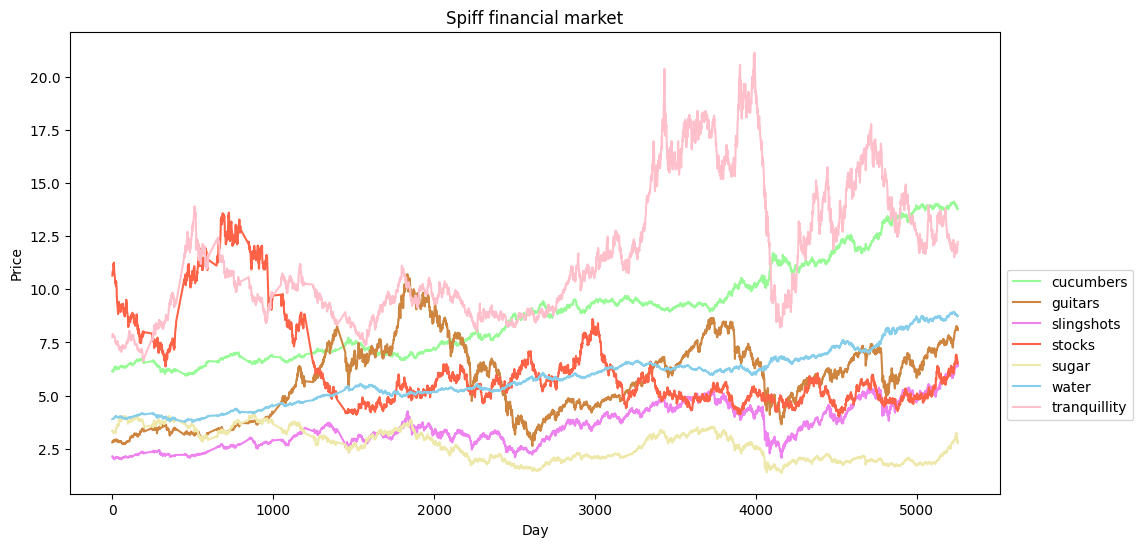

In [49]:
# Plain plot of time series

df.plot(figsize=(12, 6), color=colours)
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Spiff financial market')
plt.legend(bbox_to_anchor=(1, 0.5))

Clear trend in cucumbers and water

trend:
- long term increase/decrease
- often smooth

seasonality:
- repeating patterns at fixed intervals
- often tied to weeks/monts/years


#ACF for trend/seasonality

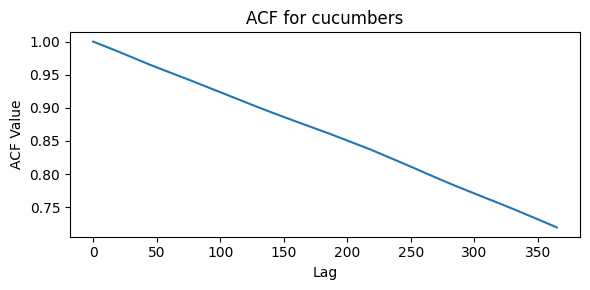

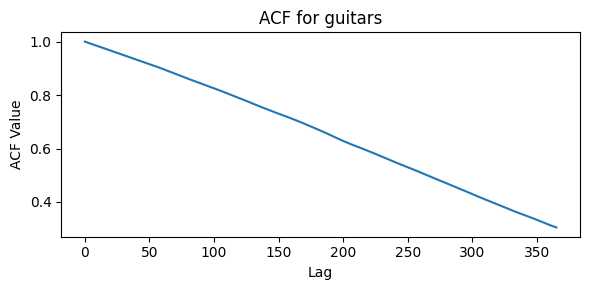

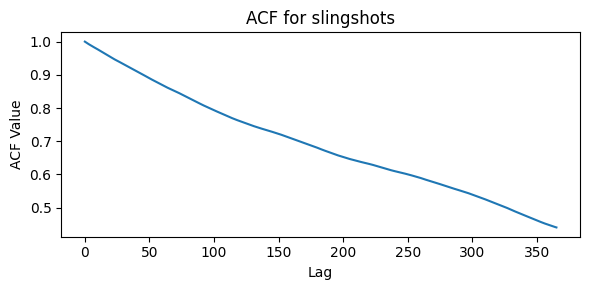

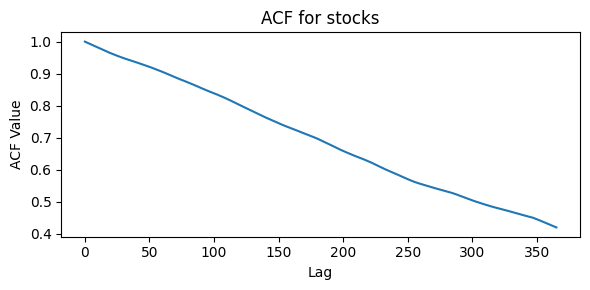

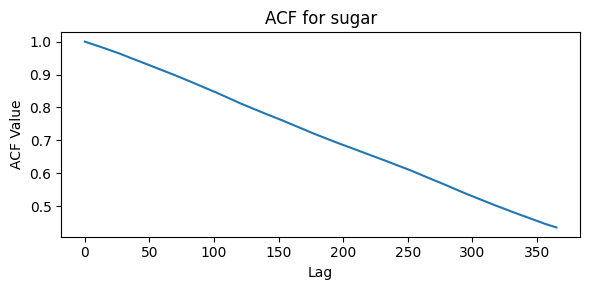

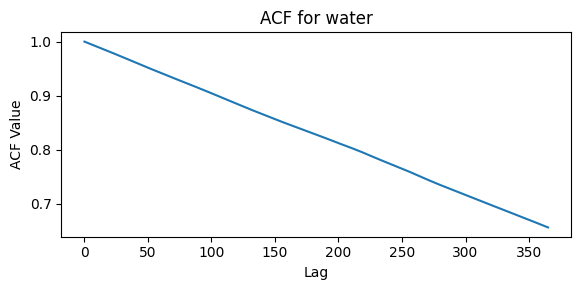

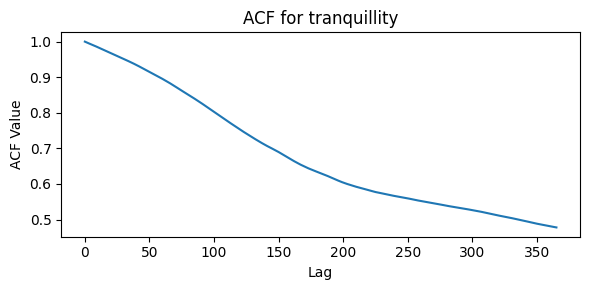

In [75]:
from statsmodels.graphics.tsaplots import plot_acf

def manual_acf(x, max_lag):
    x = np.array(x)
    n = len(x)
    x_mean = np.mean(x)
    acf_vals = []

    denom = np.sum((x - x_mean) ** 2)

    for lag in range(max_lag + 1):
        if lag == 0:
            num = denom  # ACF at lag 0 is always 1
        else:
            num = np.sum((x[lag:] - x_mean) * (x[:-lag] - x_mean))
        acf_vals.append(num / denom)

    return acf_vals

for item in df.columns:
  lag = 365

  acf_vals = manual_acf(df[item].dropna(), lag)

  plt.figure(figsize=(6, 3))
  plt.plot(acf_vals)
  #plt.stem(range(lag+1), acf_vals)

  plt.title(f'ACF for {item}')
  plt.xlabel('Lag')
  plt.ylabel('ACF Value')

  #plt.xticks(range(lag+1))
  #plt.ylim(0.8, 1)

  plt.tight_layout()
  plt.show()

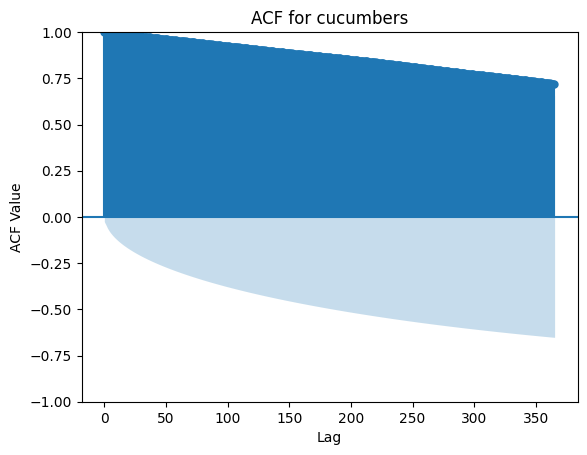

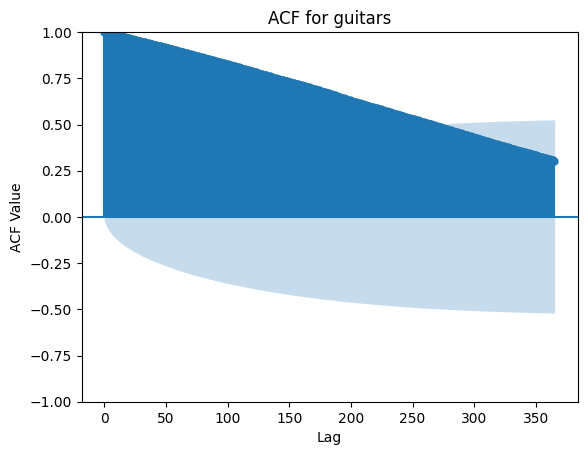

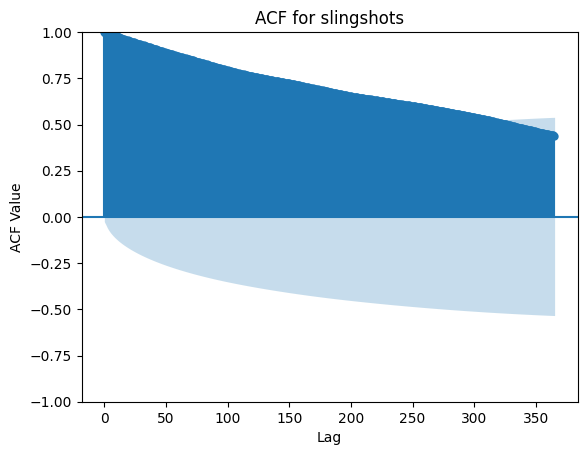

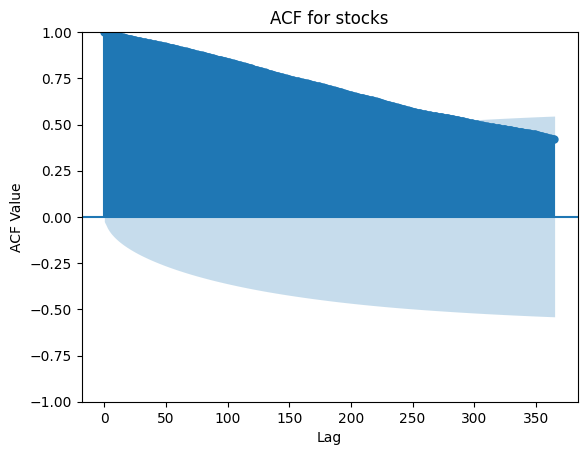

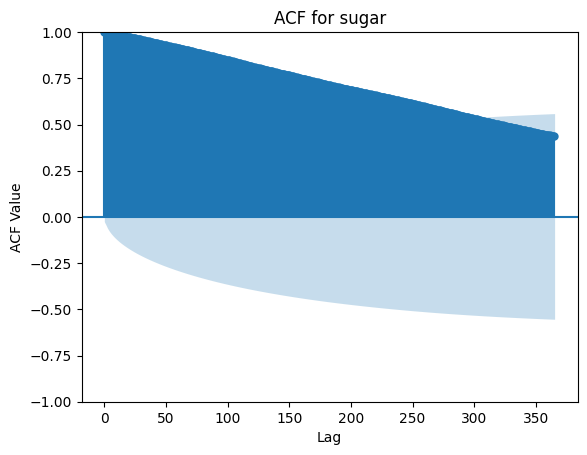

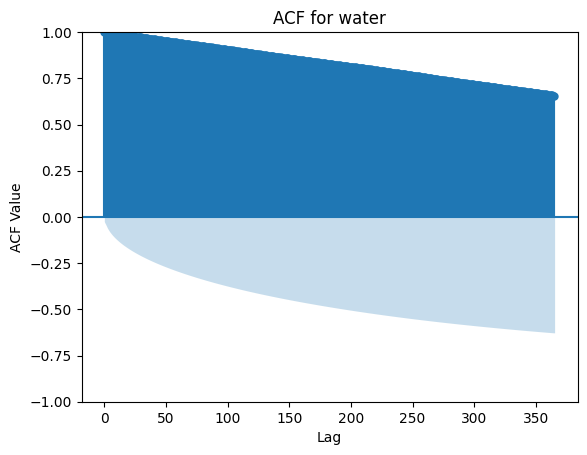

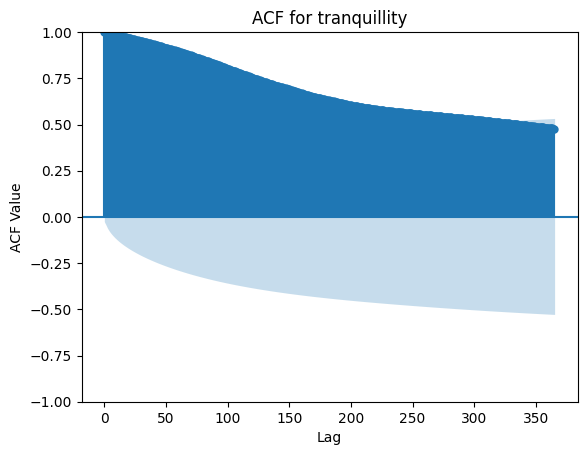

In [78]:
from statsmodels.graphics.tsaplots import plot_acf

for item in df.columns:
  lag = 365

  plot_acf(df[item].dropna(), lags=lag)
  plt.title(f'ACF for {item}')
  plt.xlabel('Lag')
  plt.ylabel('ACF Value')
  plt.show()

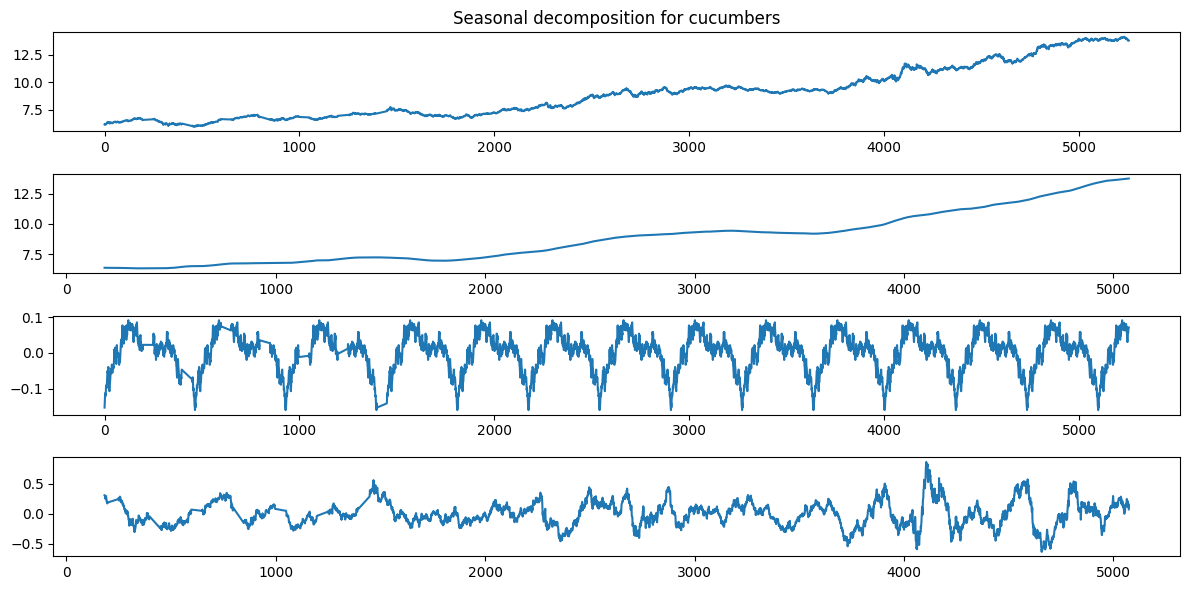

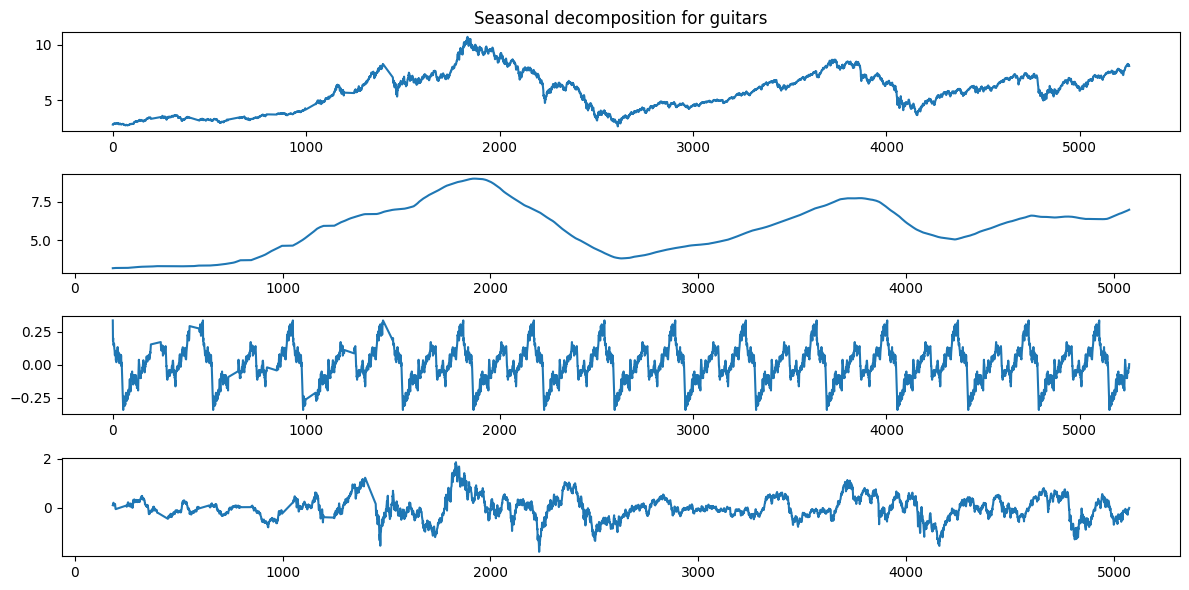

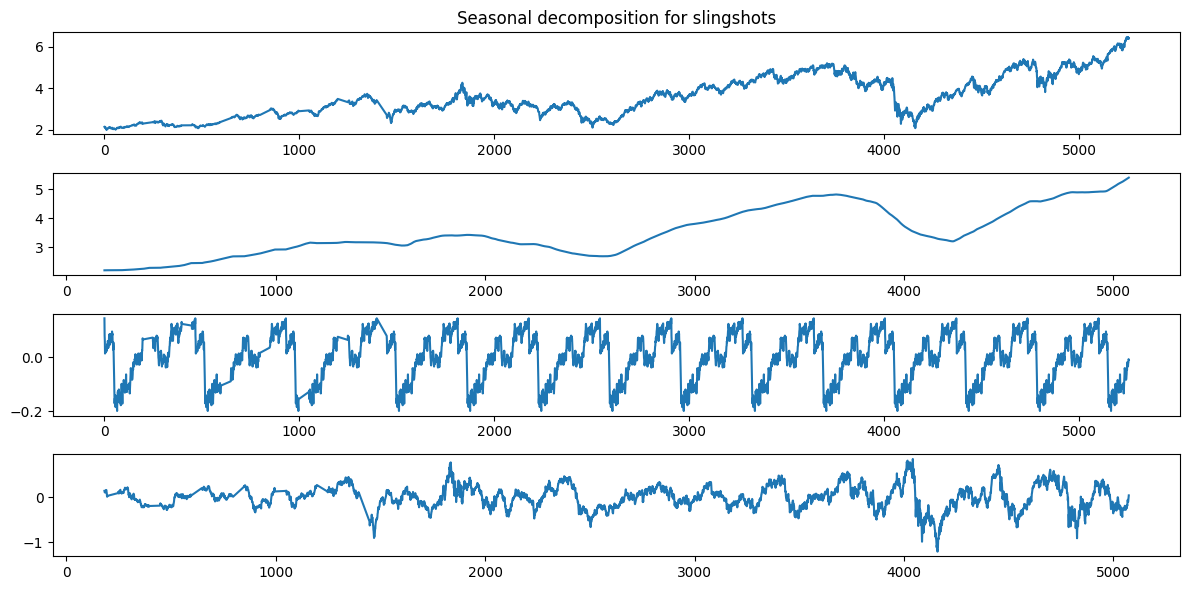

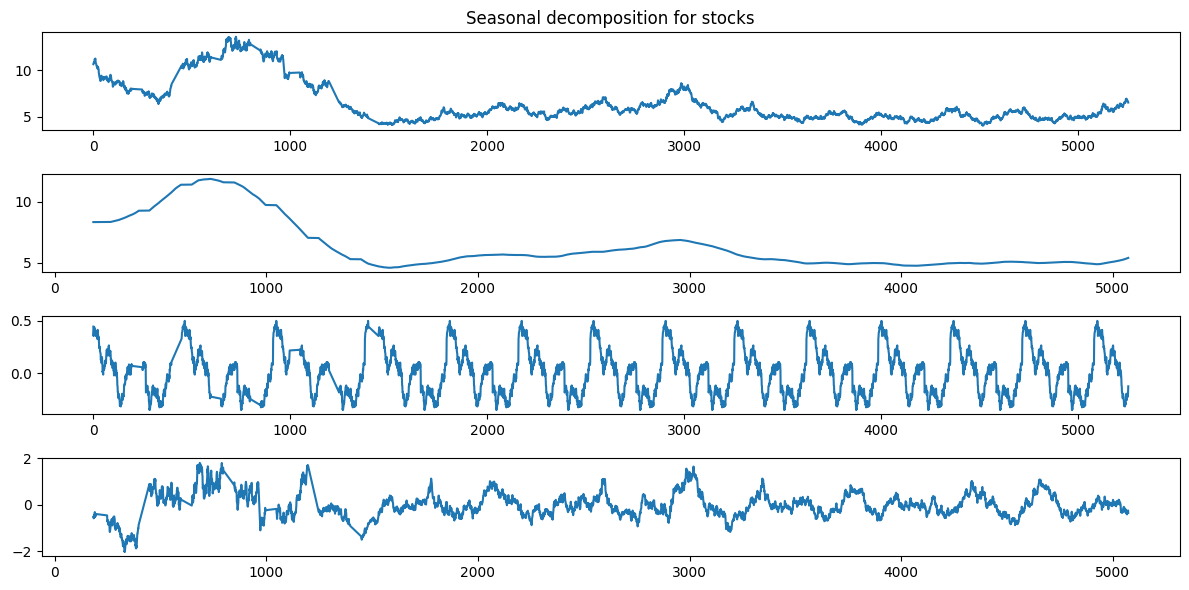

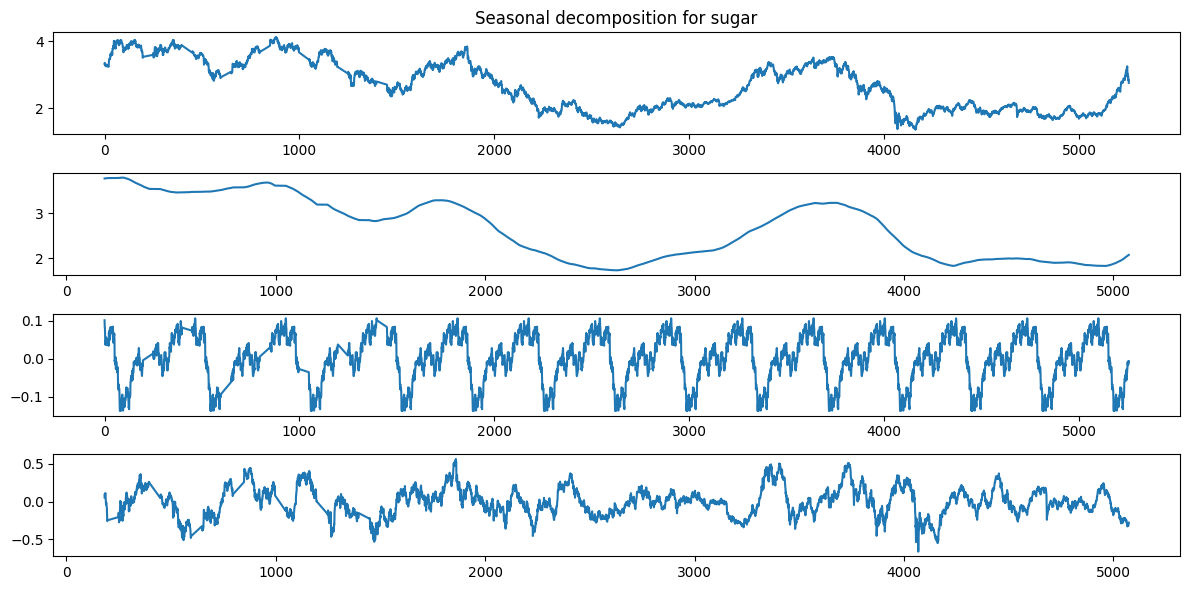

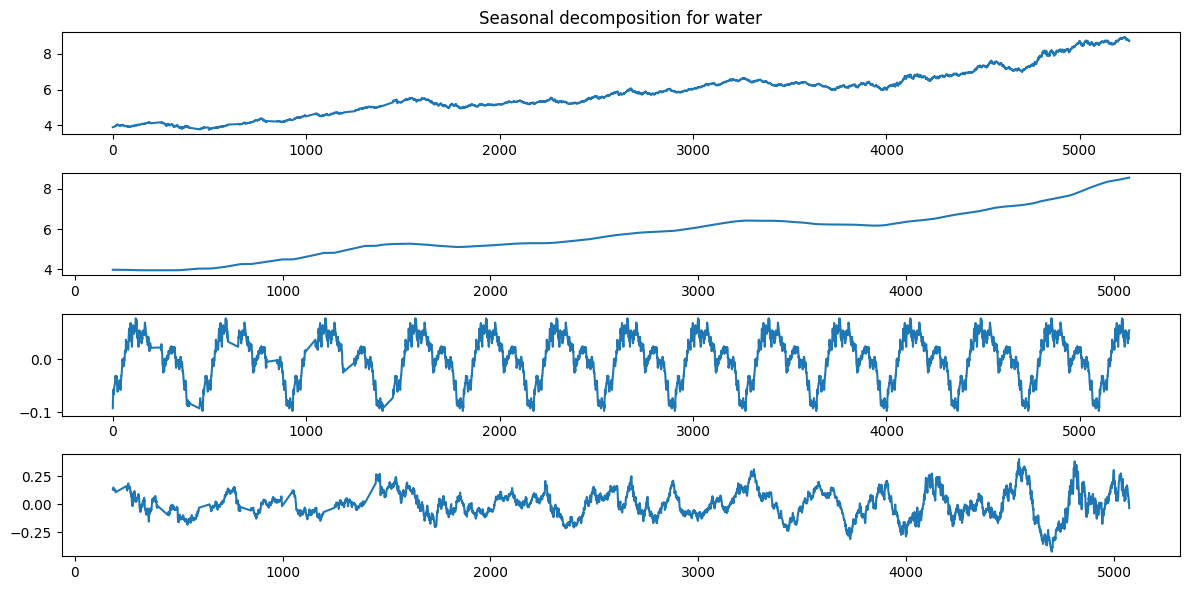

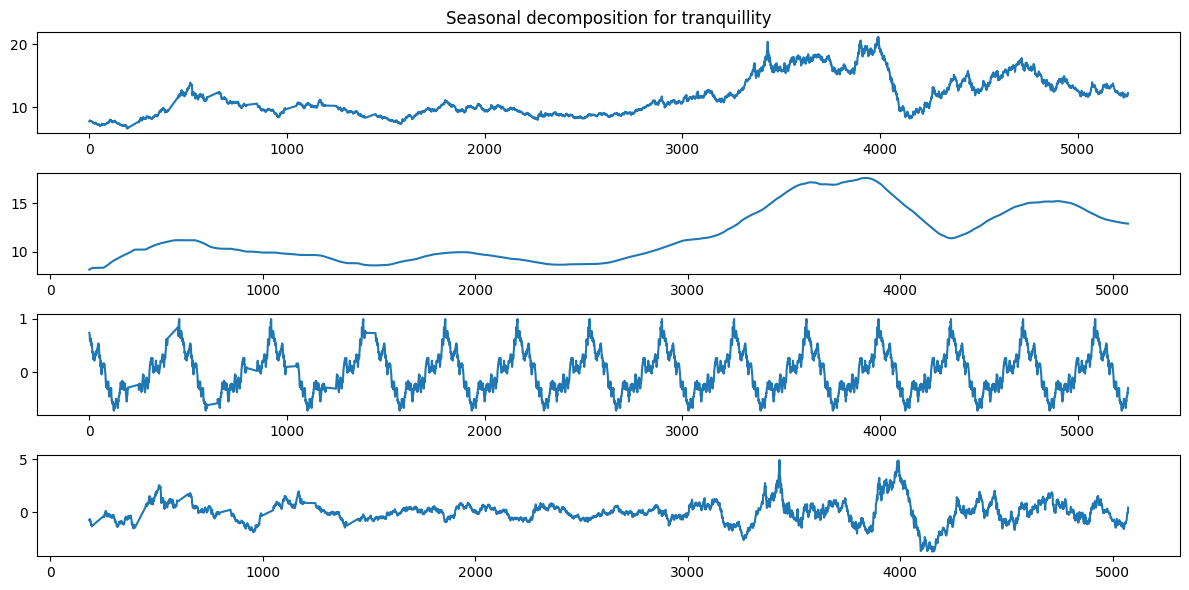

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

# for decomposition, perhaps better to interpolate missing values instead of removing

for item in df.columns:
  result = seasonal_decompose(df[item], model='additive', period=365)

  plt.figure(figsize=(12, 6))
  plt.subplot(411)
  plt.plot(df[item], label='Original')
  plt.title(f'Seasonal decomposition for {item}')

  plt.subplot(412)
  plt.plot(result.trend, label='Trend')

  plt.subplot(413)
  plt.plot(result.seasonal, label='Seasonal')

  plt.subplot(414)
  plt.plot(result.resid, label='Residual')

  plt.tight_layout()
  plt.show()

Analyze scale of seasonal components compared to trend or residuals.

# Log Returns

In [34]:
log_returns = np.log(df / df.shift(1)).dropna()

log_returns.head()

,cucumbers,guitars,slingshots,stocks,sugar,water,tranquillity
1,0.005666,0.017307,-0.010802,0.001949,0.009233,0.000966,0.003273
2,-0.003396,-0.001205,0.001302,0.013761,-0.005760,-0.000644,0.013390
3,-0.001986,-0.005743,-0.009590,0.002439,-0.014548,0.000966,-0.004848
4,-0.005125,0.003329,0.001751,0.001099,0.004678,0.001072,0.004445
5,0.003420,0.011415,0.004363,-0.004095,0.000000,0.001392,-0.004040


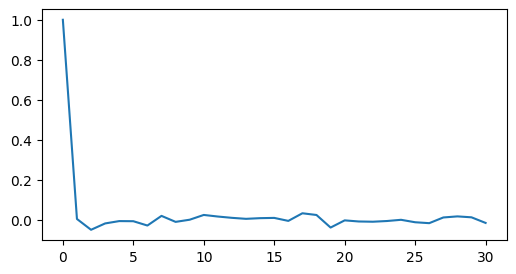

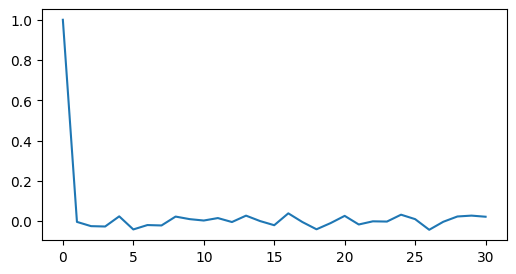

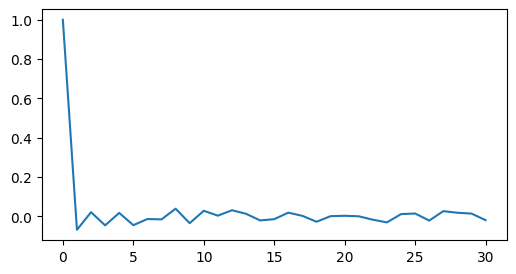

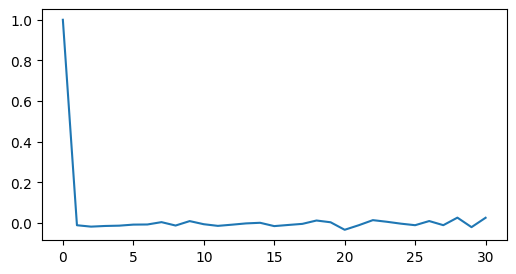

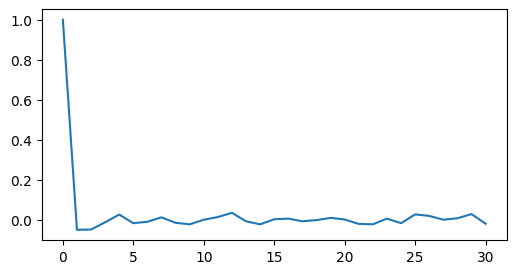

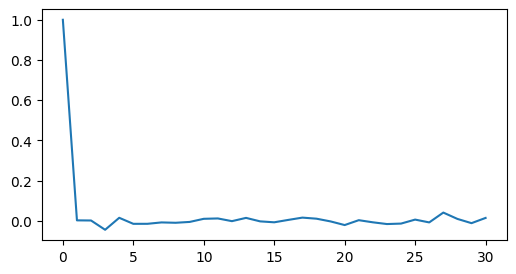

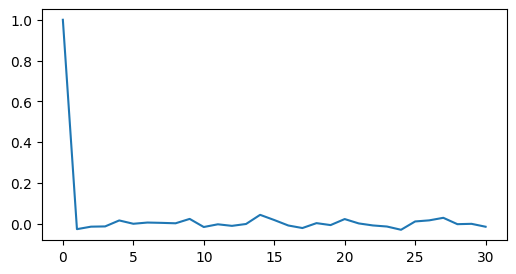

In [36]:
for item in log_returns.columns:
  lag = 30

  acf_vals = manual_acf(log_returns[item], lag)

  plt.figure(figsize=(6, 3))
  plt.plot(acf_vals)